## P-value

The probability that a given observation would occur by chance alone.

#### Alpha

How do we determine if a result is "too unusual"?
The frequentist convention is that if a p-value is less than .05, we can say that it is a "statistically significant" observation. We typically denote this significance threshold with $\alpha$, e.g., $\alpha = .05$

Any chosen level is an arbitrary decision—there is nothing about the process that will guarantee correct decisions x% of the time. This is because the probability question being answered is not “What is the probability that this happened by chance?” rather “Given a chance model, what is the probability of a result this extreme?”


- If the p-value is greater than or equal to α, do not reject the null hypothesis.

- If the p-value is less than α, reject the null hypothesis

The p-value can be calculated using the *cumulative distribution function (CDF)* of the distribution.

The z-scores corresponding to $\alpha = .05$ can be obtained from the normal distribution *percent point function (PPF)*.

#### Example (p-value)

Given 10000 students, where 69 attained a z-score above 2.5 and only 67 attained a z-score below -2.5, if we were to sample one student at random, the probability of selecting a student with a z-score above 2.5 or below -2.5 would be:

$$\frac{69 - 67}{10000} = 0.00136 = 1.36\% $$

In [1]:
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
x_i = 90
mu = 90
sigma = 2

In [3]:
rng = np.random.default_rng()
y = rng.normal(mu, sigma, 10000)

In [4]:
p_below = st.norm.cdf(-2.5)
p_above = 1-st.norm.cdf(2.5)

To calculate the number of students who scored below 90 (z-score -2.5), we can use the CDF function from the `scipy.stats` module:

In [5]:
p_below*10000

np.float64(62.096653257761325)

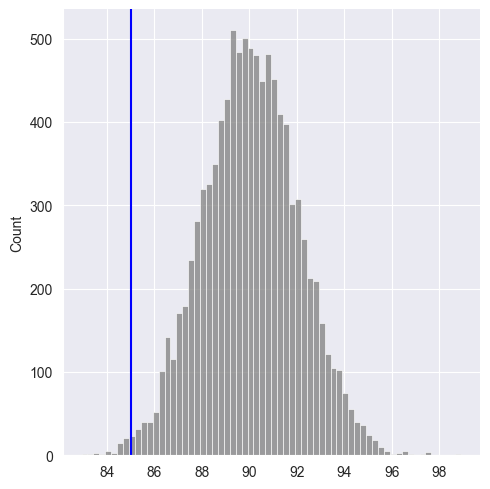

In [6]:
sns.displot(y, color='gray')
_ = plt.axvline(mu-2.5*sigma, color='blue')

To calculate the number of students who scored above 90 (z-score 2.5):

In [7]:
p_above

np.float64(0.006209665325776159)

In [8]:
p_above*10000

np.float64(62.09665325776159)

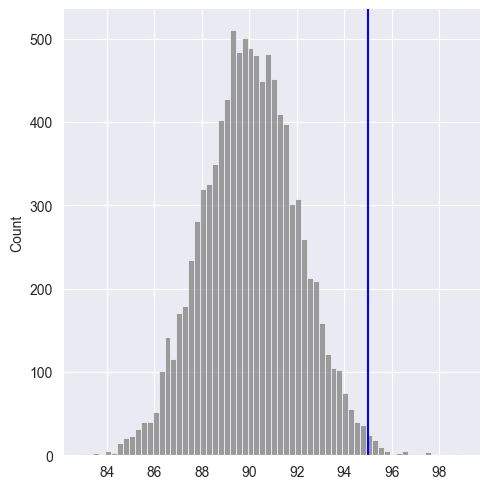

In [9]:
sns.displot(y, color='gray')
_ = plt.axvline(mu+2.5*sigma, color='blue')

The probability of a student scoring below 90 (z-score -2.5) or above 90 (z-score 2.5) is:

In [10]:
p_outside = p_below + p_above
p_outside

np.float64(0.01241933065155229)

The number of students who scored below 90 (z-score -2.5) or above 90 (z-score 2.5) is:

In [11]:
p_outside*10000

np.float64(124.1933065155229)

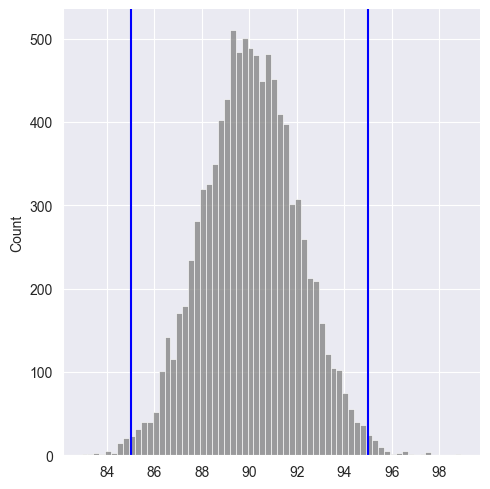

In [12]:
sns.displot(y, color='gray')
plt.axvline(mu+2.5*sigma, color='blue')
_ = plt.axvline(mu-2.5*sigma, color='blue')

#### Example (z-scores)

To capture 95% of the values around the mean, we leave 2.5% at the bottom of the distribution and 2.5% at the top:

In [13]:
st.norm.ppf(.025)

np.float64(-1.9599639845400545)

To capture 99% of the values around the mean, we leave 0.5% at the bottom of the distribution and 0.5% at the top:

In [14]:
st.norm.ppf(.975)

np.float64(1.959963984540054)

At the traditional significance level of $\alpha = .05$, a sampled value with a z-score less than -1.96 or greater than 1.96 would be considered statistically significant.

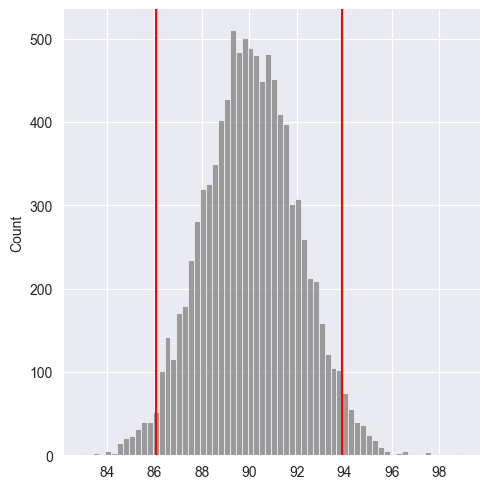

In [15]:
sns.displot(y, color='gray')
plt.axvline(mu+1.96*sigma, color='red')
_ = plt.axvline(mu-1.96*sigma, color='red')

Changing the threshold to a stricter $\alpha = .01$:

In [16]:
st.norm.ppf(.005), st.norm.ppf(.995)

(np.float64(-2.575829303548901), np.float64(2.5758293035489004))

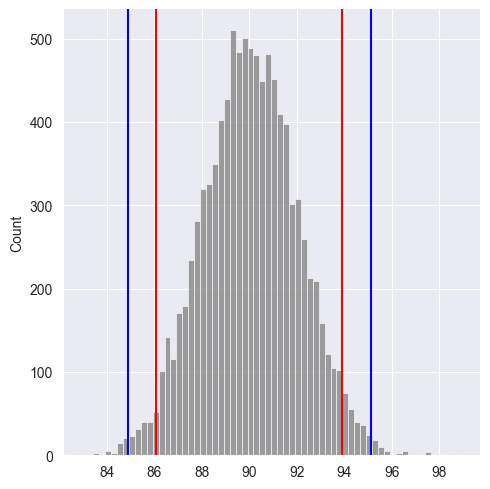

In [17]:
sns.displot(y, color='gray')

plt.axvline(mu+1.96*sigma, color='red')
plt.axvline(mu-1.96*sigma, color='red')

plt.axvline(mu+2.56*sigma, color='blue')
_ = plt.axvline(mu-2.56*sigma, color='blue')